In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('process-data-v2.csv')

data

,cpuUtilization(%),processName,processID,memoryUtilization(%),ciName,lastPolledAt
0,0.02,CAPSM,1780,1.05,awnck006,2023-09-12T08:30:24.000Z
1,0.00,conhost,5968,0.00,awnck006,2023-09-12T08:30:24.000Z
2,0.01,csrss,540,0.00,awnck006,2023-09-12T08:30:24.000Z
3,0.15,DCProcessMonitor,5084,0.43,awnck006,2023-09-12T08:30:24.000Z
4,0.00,dwm,412,0.00,awnck006,2023-09-12T08:30:24.000Z
...,...,...,...,...,...,...
101324,0.50,sqlservr,2864,0.00,awnck006,2023-09-20T11:21:12.000Z
101325,0.25,ssm-agent-worker,6304,0.99,awnck006,2023-09-20T11:21:12.000Z
101326,1.14,SWJobEngineSvc2,6652,1.87,awnck006,2023-09-20T11:21:12.000Z
101327,0.00,unsecapp,6944,0.00,awnck006,2023-09-20T11:21:12.000Z


In [2]:
data.describe()

,cpuUtilization(%),processID,memoryUtilization(%)
count,101329.000000,101329.000000,101329.000000
mean,0.601203,4026.818305,0.428217
std,3.539604,3324.097013,0.674968
min,0.000000,0.000000,0.000000
25%,0.000000,1000.000000,0.000000
50%,0.020000,2760.000000,0.100000
75%,0.060000,6428.000000,0.580000
max,65.380000,13300.000000,4.790000


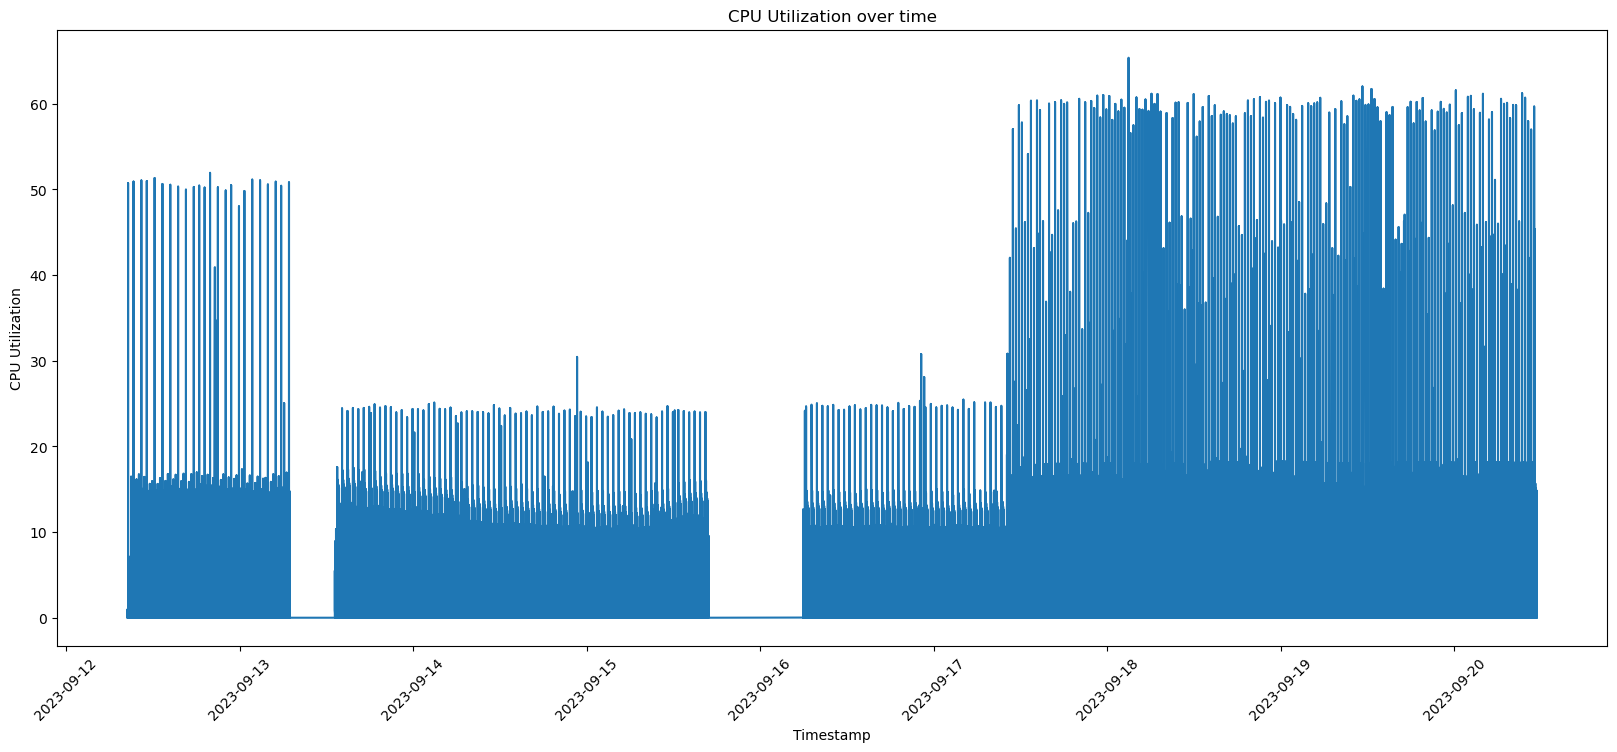

In [18]:
#Line Plot
data['lastPolledAt']=pd.to_datetime(data['lastPolledAt'])
plt.figure(figsize=(20,8))
plt.plot(data['lastPolledAt'],data['cpuUtilization(%)'])
plt.title('CPU Utilization over time')
plt.xlabel('Timestamp')
plt.ylabel('CPU Utilization')
plt.xticks(rotation=45)
plt.show()

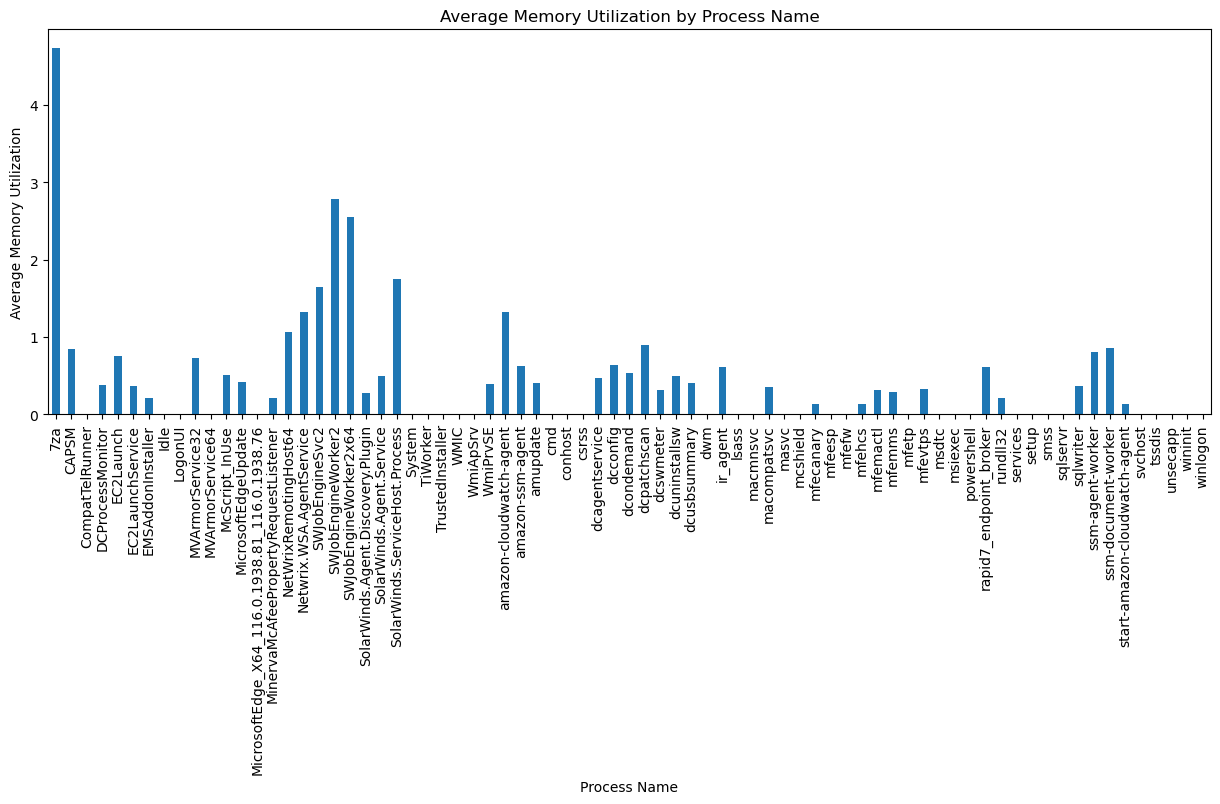

In [13]:
#Bar plot
plt.figure(figsize=(15,5))
average_memory = data.groupby('processName')['memoryUtilization(%)'].mean()
average_memory.plot(kind='bar')
plt.title('Average Memory Utilization by Process Name')
plt.xlabel('Process Name')
plt.ylabel('Average Memory Utilization')
plt.show()


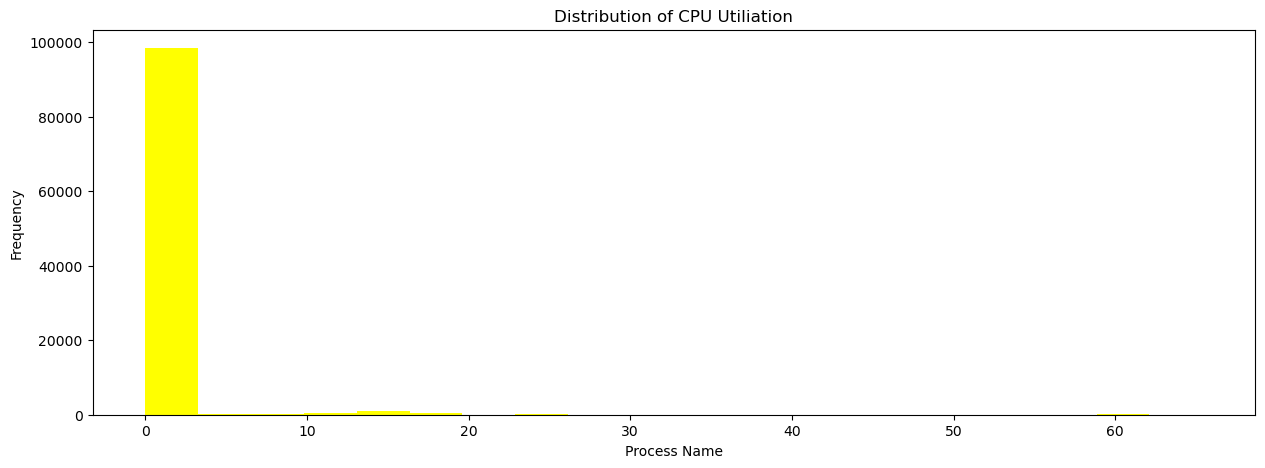

In [16]:
#Histogram
plt.figure(figsize=(15,5))
plt.hist(data['cpuUtilization(%)'],bins=20, color='yellow')
plt.title('Distribution of CPU Utiliation')
plt.xlabel('Process Name')
plt.ylabel('Frequency')
plt.show()

In [6]:
max_cpu_process = data[data['cpuUtilization(%)']==data['cpuUtilization(%)'].max()]['processName'].values[0]
max_cpu_process

'7za'

In [7]:
process_name_counts = data['processName'].value_counts()
most_frequent_process = process_name_counts.idxmax()
most_frequent_process

'CAPSM'

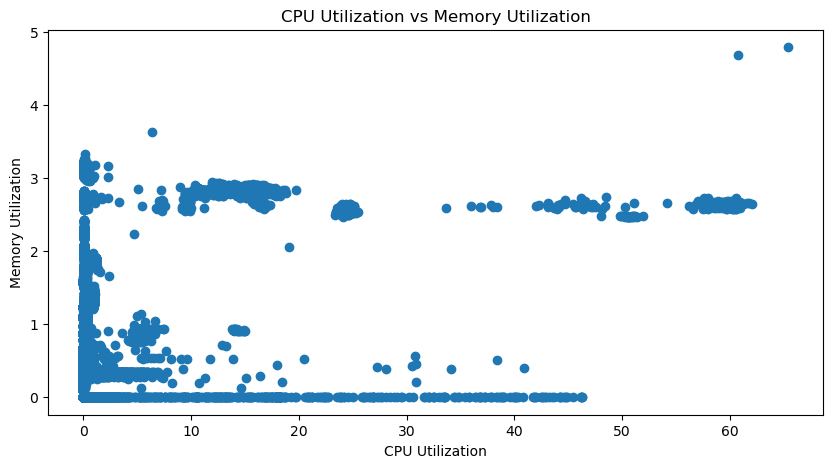

In [8]:
#Scatter Plot
plt.figure(figsize=(10,5))
plt.scatter(data['cpuUtilization(%)'], data['memoryUtilization(%)'])
plt.title('CPU Utilization vs Memory Utilization')
plt.xlabel('CPU Utilization')
plt.ylabel('Memory Utilization')
plt.show()

In [9]:
#Correlation between CPU vs Memory Utilization
correlation = data['cpuUtilization(%)'].corr(data['memoryUtilization(%)'])

correlation

0.36076372655737315

In [10]:
#maximum cpu utilized my which ci
avg_cpu_by_ci = data.groupby('ciName')['cpuUtilization(%)'].mean()
max_avg_cpu_ci = avg_cpu_by_ci.idxmax()
max_avg_cpu_ci

'awnck006'

In [11]:
#aggregation by processName
process_stats = data.groupby('processName')[['memoryUtilization(%)', 'cpuUtilization(%)']].mean()
process_stats

,memoryUtilization(%),cpuUtilization(%)
processName,,
7za,4.740000,63.050000
CAPSM,0.850033,0.024780
CompatTelRunner,0.000000,0.260000
DCProcessMonitor,0.374333,0.187470
EC2Launch,0.750000,0.750000
...,...,...
svchost,0.000000,1.831650
tssdis,0.000000,0.000659
unsecapp,0.000000,0.000392
